# Predicting House Prices Using Linear Regression (Boston Housing Dataset)

1. Load and explore the dataset
2. Clean the data and perform exploratory data analysis (EDA)
3. Build a Simple Linear Regression model using `RM`
4. Build a Multiple Linear Regression model using top 5 correlated features
5. Evaluate models using R², MAE, and RMSE
6. Visualize predictions and residuals


In [3]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# For cleaner visuals
sns.set(style="whitegrid")

In [4]:
# Step 2: Load the dataset
df = pd.read_csv("BostonHousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [5]:
# Step 3: Check for missing values and basic statistics
print("Missing values per column:")
print(df.isnull().sum())
print("\nDataset shape:", df.shape)
df.describe()

Missing values per column:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

Dataset shape: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


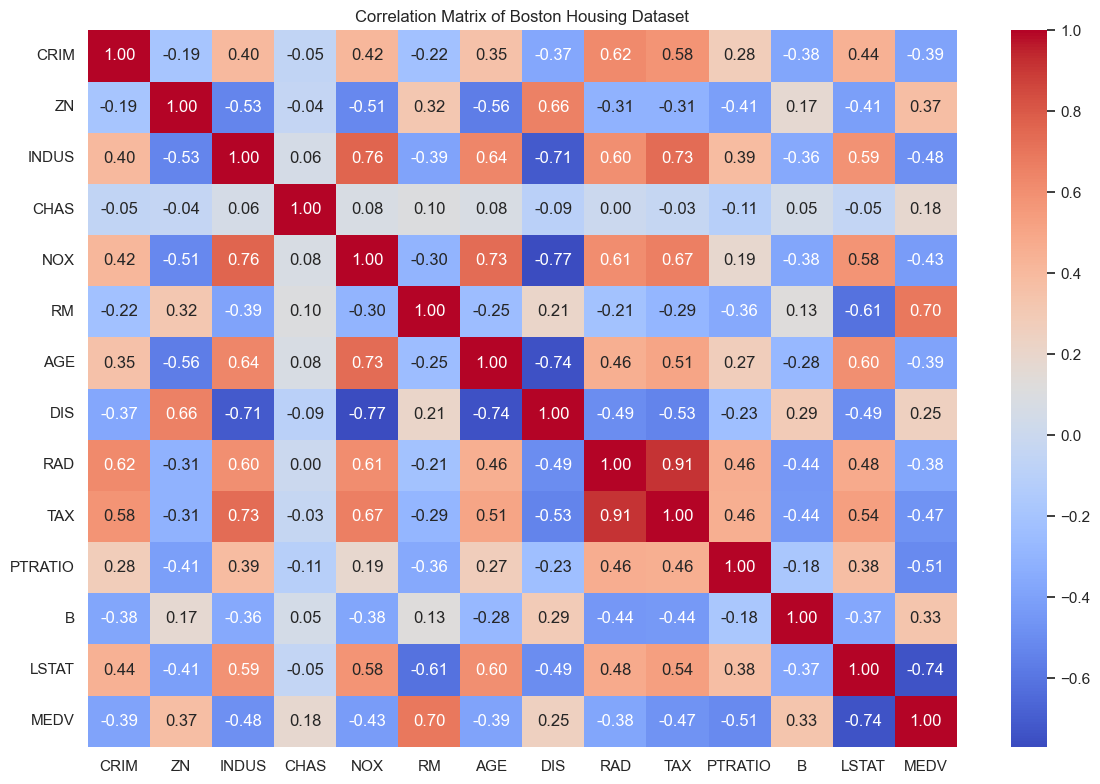

MEDV       1.000000
RM         0.695360
ZN         0.373136
B          0.333461
DIS        0.249929
CHAS       0.181391
RAD       -0.381626
CRIM      -0.391363
AGE       -0.394656
NOX       -0.427321
TAX       -0.468536
INDUS     -0.481772
PTRATIO   -0.507787
LSTAT     -0.735822
Name: MEDV, dtype: float64

In [6]:
# Step 4: Correlation matrix with MEDV
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Boston Housing Dataset")
plt.tight_layout()
plt.show()

# Features most correlated with MEDV
correlation_with_medv = correlation_matrix["MEDV"].sort_values(ascending=False)
correlation_with_medv

In [7]:
# Step 5: Drop rows with missing values
df_cleaned = df.dropna()
print("Cleaned dataset shape:", df_cleaned.shape)

# Top 5 features most correlated with MEDV (excluding MEDV itself)
top5_features = correlation_with_medv.drop("MEDV").head(5)
top5_features

Cleaned dataset shape: (394, 14)


RM      0.695360
ZN      0.373136
B       0.333461
DIS     0.249929
CHAS    0.181391
Name: MEDV, dtype: float64

In [8]:
# Step 6: Simple Linear Regression using RM
X_simple = df_cleaned[["RM"]]
y = df_cleaned["MEDV"]

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)

model_simple = LinearRegression()
model_simple.fit(X_train_s, y_train_s)

y_pred_s = model_simple.predict(X_test_s)

# Evaluation metrics
r2_s = r2_score(y_test_s, y_pred_s)
mae_s = mean_absolute_error(y_test_s, y_pred_s)
rmse_s = np.sqrt(mean_squared_error(y_test_s, y_pred_s))

print("Simple Linear Regression (RM only)")
print(f"R² Score: {r2_s:.4f}")
print(f"MAE: {mae_s:.4f}")
print(f"RMSE: {rmse_s:.4f}")
print(f"Coefficient (RM): {model_simple.coef_[0]:.4f}")
print(f"Intercept: {model_simple.intercept_:.4f}")

Simple Linear Regression (RM only)
R² Score: 0.4787
MAE: 4.2050
RMSE: 6.6311
Coefficient (RM): 9.4000
Intercept: -36.9541


In [9]:
# Step 7: Multiple Linear Regression using top 5 features
top_features = ["RM", "ZN", "B", "DIS", "CHAS"]
X_multiple = df_cleaned[top_features]

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multiple, y, test_size=0.2, random_state=42)

model_multiple = LinearRegression()
model_multiple.fit(X_train_m, y_train_m)

y_pred_m = model_multiple.predict(X_test_m)

# Evaluation
r2_m = r2_score(y_test_m, y_pred_m)
mae_m = mean_absolute_error(y_test_m, y_pred_m)
rmse_m = np.sqrt(mean_squared_error(y_test_m, y_pred_m))

print("Multiple Linear Regression (Top 5 Features)")
print(f"R² Score: {r2_m:.4f}")
print(f"MAE: {mae_m:.4f}")
print(f"RMSE: {rmse_m:.4f}")

# Coefficients
coefficients_m = pd.DataFrame({
    "Feature": top_features,
    "Coefficient": model_multiple.coef_
})
coefficients_m.loc[len(coefficients_m.index)] = ["Intercept", model_multiple.intercept_]
coefficients_m

Multiple Linear Regression (Top 5 Features)
R² Score: 0.5432
MAE: 3.9114
RMSE: 6.2075


,Feature,Coefficient
0,RM,8.233279
1,ZN,0.055611
2,B,0.024293
3,DIS,0.106235
4,CHAS,2.791112
5,Intercept,-39.480294


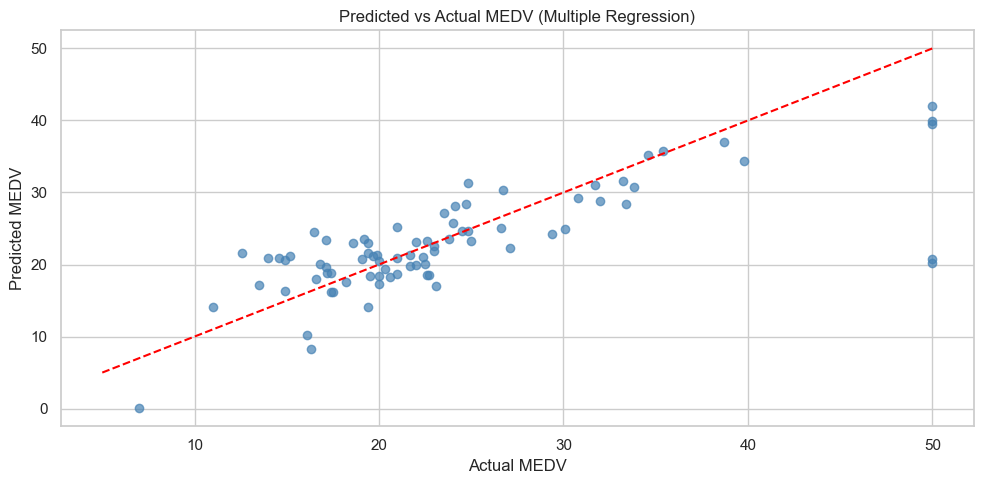

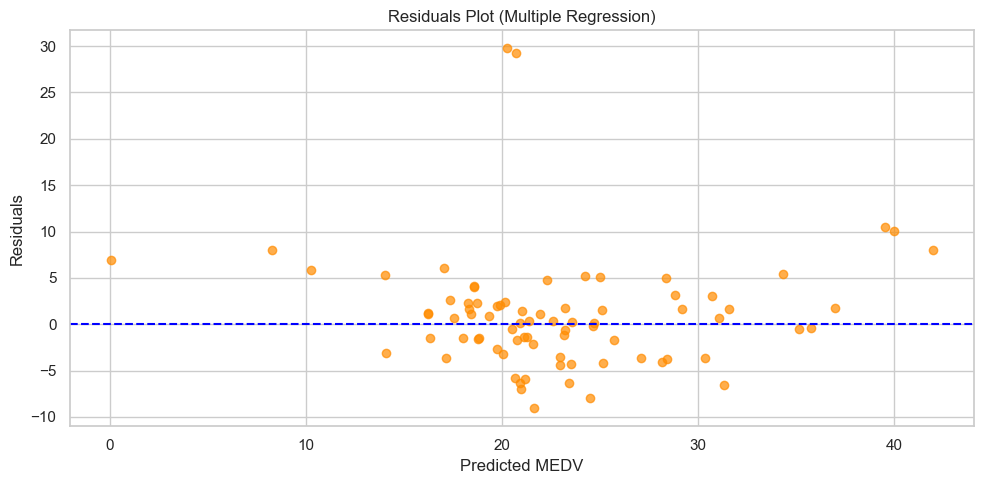

In [10]:
# Step 8: Visualizations - Predicted vs Actual and Residuals Plot

# Predicted vs Actual
plt.figure(figsize=(10, 5))
plt.scatter(y_test_m, y_pred_m, color='steelblue', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title("Predicted vs Actual MEDV (Multiple Regression)")
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.grid(True)
plt.tight_layout()
plt.show()

# Residuals plot
residuals = y_test_m - y_pred_m
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_m, residuals, color='darkorange', alpha=0.7)
plt.axhline(y=0, color='blue', linestyle='--')
plt.title("Residuals Plot (Multiple Regression)")
plt.xlabel("Predicted MEDV")
plt.ylabel("Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()